In [2]:
import numpy as np
import numba as nb
import matplotlib.pyplot as plt
from tt_cross.src.functions import *
from tt_cross.src.dmrg_cross import *

# N-Dimensional interpolator

In [3]:
# grid_creation
num_var = 40
subdivision = 25
temp = [np.linspace(0.5, 2, subdivision) for _ in range(num_var)]
grid = np.array(temp)
grid

array([[0.5   , 0.5625, 0.625 , 0.6875, 0.75  , 0.8125, 0.875 , 0.9375,
        1.    , 1.0625, 1.125 , 1.1875, 1.25  , 1.3125, 1.375 , 1.4375,
        1.5   , 1.5625, 1.625 , 1.6875, 1.75  , 1.8125, 1.875 , 1.9375,
        2.    ],
       [0.5   , 0.5625, 0.625 , 0.6875, 0.75  , 0.8125, 0.875 , 0.9375,
        1.    , 1.0625, 1.125 , 1.1875, 1.25  , 1.3125, 1.375 , 1.4375,
        1.5   , 1.5625, 1.625 , 1.6875, 1.75  , 1.8125, 1.875 , 1.9375,
        2.    ],
       [0.5   , 0.5625, 0.625 , 0.6875, 0.75  , 0.8125, 0.875 , 0.9375,
        1.    , 1.0625, 1.125 , 1.1875, 1.25  , 1.3125, 1.375 , 1.4375,
        1.5   , 1.5625, 1.625 , 1.6875, 1.75  , 1.8125, 1.875 , 1.9375,
        2.    ],
       [0.5   , 0.5625, 0.625 , 0.6875, 0.75  , 0.8125, 0.875 , 0.9375,
        1.    , 1.0625, 1.125 , 1.1875, 1.25  , 1.3125, 1.375 , 1.4375,
        1.5   , 1.5625, 1.625 , 1.6875, 1.75  , 1.8125, 1.875 , 1.9375,
        2.    ],
       [0.5   , 0.5625, 0.625 , 0.6875, 0.75  , 0.8125, 0.875 , 0.93

In [4]:
# interpolator initialization

example_interpolator = greedy_cross(
    func=lambda x: 1, num_variables=num_var, grid=grid, tol=1e-2, max_bond=5, sweeps=3, is_f_complex=False
)

In [5]:
example_interpolator._create_initial_index_sets()
example_interpolator.i

array([array([[1.]]), array([[0.5]]), array([[0.5, 0.5]]),
       array([[0.5, 0.5, 0.5]]), array([[0.5, 0.5, 0.5, 0.5]]),
       array([[0.5, 0.5, 0.5, 0.5, 0.5]]),
       array([[0.5, 0.5, 0.5, 0.5, 0.5, 0.5]]),
       array([[0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]]),
       array([[0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]]),
       array([[0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]]),
       array([[0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]]),
       array([[0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]]),
       array([[0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]]),
       array([[0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]]),
       array([[0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
               0.5]])                                                          ,
       array([[0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
               0.5, 0.5]])                                           

In [6]:
len(example_interpolator.j[0][0])

39

In [7]:
example_interpolator._create_initial_bonds()
example_interpolator.compute_single_site_tensor(2)

array([[[1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.]]])

In [8]:
example_interpolator.index_update(2)

In [9]:
example_interpolator.i[3]

array([[0.5, 0.5, 0.5]])

In [10]:
example_interpolator.bonds

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [11]:
example_interpolator = greedy_cross(
    func=slater, num_variables=num_var, grid=grid, tol=1e-5, max_bond=10, sweeps=6, is_f_complex=False
)

tensors = example_interpolator.run()

In [12]:
for t in tensors:
    print(t.shape)

(1, 25, 6)
(6, 6)
(6, 25, 6)
(6, 6)
(6, 25, 6)
(6, 6)
(6, 25, 7)
(7, 7)
(7, 25, 6)
(6, 6)
(6, 25, 7)
(7, 7)
(7, 25, 7)
(7, 7)
(7, 25, 7)
(7, 7)
(7, 25, 7)
(7, 7)
(7, 25, 7)
(7, 7)
(7, 25, 7)
(7, 7)
(7, 25, 7)
(7, 7)
(7, 25, 7)
(7, 7)
(7, 25, 6)
(6, 6)
(6, 25, 7)
(7, 7)
(7, 25, 7)
(7, 7)
(7, 25, 6)
(6, 6)
(6, 25, 7)
(7, 7)
(7, 25, 7)
(7, 7)
(7, 25, 7)
(7, 7)
(7, 25, 7)
(7, 7)
(7, 25, 7)
(7, 7)
(7, 25, 6)
(6, 6)
(6, 25, 7)
(7, 7)
(7, 25, 7)
(7, 7)
(7, 25, 7)
(7, 7)
(7, 25, 7)
(7, 7)
(7, 25, 7)
(7, 7)
(7, 25, 7)
(7, 7)
(7, 25, 7)
(7, 7)
(7, 25, 7)
(7, 7)
(7, 25, 6)
(6, 6)
(6, 25, 7)
(7, 7)
(7, 25, 7)
(7, 7)
(7, 25, 7)
(7, 7)
(7, 25, 7)
(7, 7)
(7, 25, 7)
(7, 7)
(7, 25, 6)
(6, 6)
(6, 25, 5)
(5, 5)
(5, 25, 1)


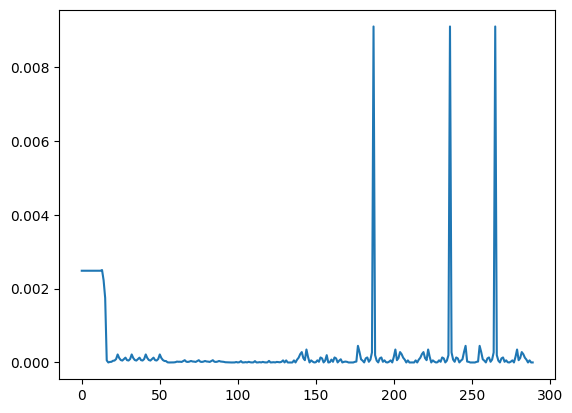

In [13]:
# This error corresponds to np.sum(np.abs(superblock-superblock_approx)) at each pivot finding step

plt.plot(example_interpolator.error[100:])

In [14]:
for i in range(num_var - 1):
    print(np.concatenate((example_interpolator.i[i + 1], example_interpolator.j[i]), axis=1))
    print(np.concatenate((example_interpolator.i[i + 1], example_interpolator.j[i]), axis=1).shape)
    print("==============================")

[[0.5    0.5    0.5    0.5    0.5    0.5    0.5    0.5    0.5    0.5
  0.5    0.5    0.5    0.5    0.5    0.5    0.5    0.5    0.5    0.5
  0.5    0.5    0.5    0.5    0.5    0.5    0.5    0.5    0.5    0.5
  0.5    0.5    0.5    0.5    0.5    0.5    0.5    0.5    0.5    0.5   ]
 [2.     2.     0.5    0.5    0.5    0.5    0.5    0.5    0.5    0.5
  0.5    0.5    0.5    0.5    0.5    0.5    0.5    0.5    0.5    0.5
  0.5    0.5    0.5    0.5    0.5    0.5    0.5    0.5    0.5    0.5
  0.5    0.5    0.5    0.5    0.5    0.5    0.5    0.5    0.5    0.5   ]
 [1.25   2.     0.9375 2.     0.5    0.5    0.5    0.5    0.5    0.5
  0.5    0.5    0.5    0.5    0.5    0.5    0.5    0.5    0.5    0.5
  0.5    0.5    0.5    0.5    0.5    0.5    0.5    0.5    0.5    0.5
  0.5    0.5    0.5    0.5    0.5    0.5    0.5    0.5    0.5    0.5   ]
 [1.6875 1.125  0.5    0.5    0.5    0.5    0.5    0.5    0.5    0.5
  0.5    0.5    0.5    0.5    0.5    0.5    0.5    0.5    0.5    0.5
  0.5    0.5    0.5   

## 1D Interpolator


In [15]:
interval = [0, 25]
d = 15


sinc_interpolator = one_dim_function_interpolator(
    func=np.sinc,
    interval=interval,
    d=d,
    complex_function=False,
)

In [16]:
sinc_interpolator.func_from_binary([0 for _ in range(3)])

0.9999997606306061

In [17]:
sinc_interpolator.h

0.000762939453125

In [18]:
sinc_interpolator.interpolate(
    max_bond=5,
    tol=1e-10,
    sweeps=3,
)

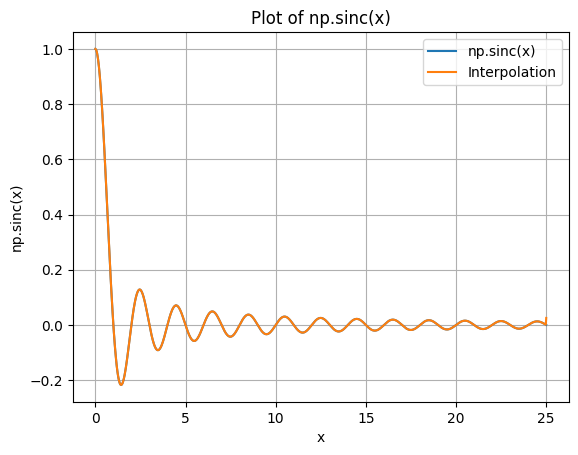

In [19]:
import matplotlib.pyplot as plt

x = np.linspace(0, 25, 1000)
y = np.sinc(x)
interpolation = np.array([sinc_interpolator.eval(x_i) for x_i in x])

plt.plot(x, y, label="np.sinc(x)")
plt.plot(x, interpolation, label="Interpolation")

plt.xlabel("x")
plt.ylabel("np.sinc(x)")
plt.title("Plot of np.sinc(x)")
plt.legend()
plt.grid(True)
plt.show()

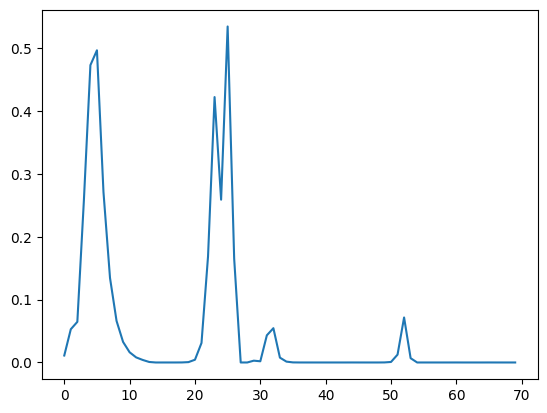

In [20]:
plt.plot(sinc_interpolator.interpolator.error)

In [21]:
for i in range(sinc_interpolator.d - 1):
    print(np.concatenate((sinc_interpolator.interpolator.i[i + 1], sinc_interpolator.interpolator.j[i]), axis=1))
    print("==============================")

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]]
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1.]]
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [0. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1.]]
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [0. 0. 1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [0. 0. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1